In [ ]:
library(phyloseq)
library(gridExtra)
library(ggplot2)
library(reshape)
library(RColorBrewer) 
library(gplots)

In [ ]:
mytheme = theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), legend.title=element_blank(), legend.key=element_blank())

In [ ]:
getFDR = function(import_file) {
    import = readRDS(import_file)
    p = import$p
    p_shuff = melt(import$p_shuff)$val
    ps = import$ps
    p_cutoff = p
    n_sig = c(0,sapply(p_cutoff, function(x) {sum(p<=x)}))
    fdr = c(0,sapply(p_cutoff, function(x) {mean(p_shuff<=x) / mean(p<=x)}))   
    return(list(n_sig=n_sig, fdr=fdr, p_cutoff = c(0,p_cutoff)))
}

getFDRSmall = function(import_file) {
    import = readRDS(import_file)
    p = sort(import$p)[1:1000]
    p_shuff = apply(import$p_shuff, 1, function(x){sort(x)[1:1000]})
    ps = import$ps
    p_cutoff = p
    n_sig = c(0,sapply(p_cutoff, function(x) {sum(p<=x)}))
    fdr = c(0,sapply(p_cutoff, function(x) {mean(p_shuff<=x) / mean(p<=x)}))    
    return(list(n_sig=n_sig, fdr=fdr, p_cutoff = c(0,p_cutoff)))
}

# Autism

In [6]:
fdr = getFDRSmall("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/Class.rds")
fdr_df = data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, type='ASV')


In [7]:
study='yogurt'
fdr = getFDRSmall(paste0("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/", study, "/p_vals/ASVs.rds"))
fdr_df = data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, type='ASV')

for (tax_level in c('Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')) {
    message(tax_level)
    fdr = getFDR(paste0("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/", study, "/p_vals/", tax_level, '.rds'))
    fdr_df = rbind(fdr_df, data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, type=tax_level))
}
for (type in c('DECIPHER_1', 'DECIPHER_2', 'Muscle_1', 'Muscle_2','ClustalOmega_1', 'ClustalOmega_2', 'ClustalW_1', 'ClustalW_2')) {
    fdr = getFDRSmall(paste0("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/", study, "/p_vals/", type ,".rds"))
    fdr_df  = rbind(fdr_df, data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, type=type))
}


Phylum
Using  as id variables
Class
Using  as id variables
Order
Using  as id variables
Family
Using  as id variables
Genus
Using  as id variables
Species
Using  as id variables


In [8]:
fdr_df_baseline = fdr_df[fdr_df$type %in% c('Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'DECIPHER_2'),]
fdr_df_alg = fdr_df[fdr_df$type %in% c('DECIPHER_1', 'DECIPHER_2', 'Muscle_1', 'Muscle_2','ClustalOmega_1', 'ClustalOmega_2', 'ClustalW_1', 'ClustalW_2'),]

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 599 rows containing missing values (geom_path).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 3973 rows containing missing values (geom_path).”

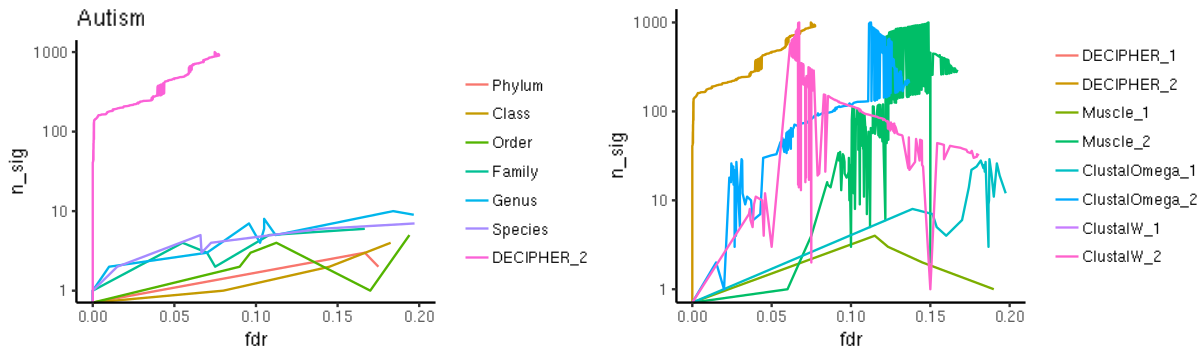

In [11]:
mytheme = theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), legend.title=element_blank(), legend.key=element_blank())
options(repr.plot.height=3, repr.plot.width=10)
p1 = ggplot(fdr_df_baseline) + geom_line(aes(x=fdr,y=n_sig, color=type)) + xlim(0,.2) + scale_y_log10() + ggtitle('Autism') + mytheme
p2 = ggplot(fdr_df_alg) + geom_line(aes(x=fdr,y=n_sig, color=type)) + xlim(0,.2) + scale_y_log10() + mytheme
grid.arrange(p1, p2, nrow=1)



In [15]:
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/DECIPHER_2.rds")
var_names = a$var_names[order(a$p)[1:1000],]
splits = strsplit(as.character(var_names[,1]), split = "\\.")
pos1=sapply(splits, function(x) as.integer(x[1]))
bases1=sapply(splits, function(x) (x[2]))
splits = strsplit(as.character(var_names[,2]), split = "\\.")
pos2=sapply(splits, function(x) as.integer(x[1]))
bases2=sapply(splits, function(x) (x[2]))                  

t = apply(a$seq_df[,pos1], 1, function(x) x==bases1) & apply(a$seq_df[,pos2], 1, function(x) x==bases2)
t[t==T]=1
t[t==F]=0
t = t[rowSums(t)!=0,]
t = t[,colSums(t)!=0]

In [ ]:
library(RColorBrewer) 
hmcol <- colorRampPalette(brewer.pal(9, "GnBu"))(100)
options(repr.plot.height=100, repr.plot.width=20)
p_heatmap=heatmap.2(t,  col=hmcol, trace='none', key=F, dendrogram = "none")

In [ ]:
library(RColorBrewer) 

hmcol = colorRampPalette(brewer.pal(9, "GnBu"))(100)
options(repr.plot.height=5, repr.plot.width=5)
options(repr.plot.height=10, repr.plot.width=5)
p_heatmap=heatmap.2(t,  col=hmcol, trace='none', key=F, dendrogram = "none")
#pdf('/oak/stanford/groups/dpwall/users/briannac/SBBs/results/figures/heatmap_autism.pdf', width=4, height=4)
heatmap.2(t,  col=hmcol, trace='none', key=F, dendrogram = "none", labCol = F, labRow = F, margins = c(1,1), main = "Autism") + mytheme
#dev.off()

In [48]:
tax_table(a$ps)[length(which(tax_table(a$ps)[,'Family']=='Veillonellaceae'))

[1] 81

In [ ]:
options(repr.plot.height=10, repr.plot.width=10)
p_heatmap=heatmap.2(t,  col=hmcol, trace='none', key=F, dendrogram = "none")

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”


Veillonella 
         27 


Parabacteroides 
            112 


      Acetatifactor      Acetitomaculum   Anaerosporobacter        Anaerostipes 
                  5                   3                  17                  59 
            Blautia        Butyrivibrio    Cellulosilyticum    Clostridium_XlVa 
                197                   3                   6                 178 
   Clostridium_XlVb         Coprococcus               Dorea      Eisenbergiella 
                 43                  68                  75                  10 
   Fusicatenibacter          Howardella          Hungatella         Johnsonella 
                 38                   2                  12                   1 
Lachnoanaerobaculum       Lactonifactor      Marvinbryantia         Mobilitalea 
                  2                   5                   1                   1 
           Moryella           Murimonas        Oribacterium  Parasporobacterium 
                  1                   6                   3                   1 
 Pseudobutyrivibrio       R

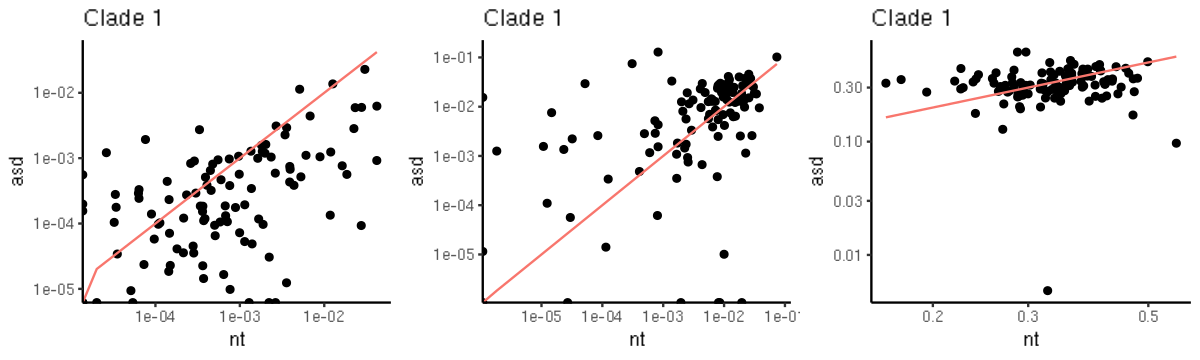

In [71]:
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/DECIPHER_2.rds")
a_ps = transform_sample_counts(a$ps, function(x) {x/sum(x)})

df = data.frame(asd=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='A', which(tax_table(a_ps)[,'Genus']=='Veillonella')]),
           nt=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='N', which(tax_table(a_ps)[,'Genus']=='Veillonella')]))
p1 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 1')+ theme(legend.position="none")

df = data.frame(asd=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='A', which(tax_table(a_ps)[,'Family']=='Porphyromonadaceae')]),
           nt=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='N', which(tax_table(a_ps)[,'Family']=='Porphyromonadaceae')]))
p2 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 1')+ theme(legend.position="none")

df = data.frame(asd=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='A', which(tax_table(a_ps)[,'Family']=='Lachnospiraceae')]),
           nt=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='N', which(tax_table(a_ps)[,'Family']=='Lachnospiraceae')]))
p3 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 1')+ theme(legend.position="none")

options(repr.plot.height=3, repr.plot.width=10)

grid.arrange(p1, p2, p3, nrow=1)

table(tax_table(a$ps)[which(tax_table(a$ps)[,'Genus']=='Veillonella'),'Genus'])
table(tax_table(a$ps)[which(tax_table(a$ps)[,'Genus']=='Parabacteroides'),'Genus'])
table(tax_table(a$ps)[which(tax_table(a$ps)[,'Family']=='Lachnospiraceae'),'Genus'])

In [54]:
table(tax_table(a$ps)[which(tax_table(a$ps)[,'Family']=='Veillonellaceae'),'Family'])


Veillonellaceae 
             81 

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”


       Anaerosinus    Parabacteroides Pseudobutyrivibrio          Rhizobium 
                 1                  1                  1                  1 
       Veillonella 
                19 


     Actinomyces      Bacteroides    Butyricimonas   Clostridium_IV 
               1                1                1                4 
     Lactococcus Methylobacterium  Parabacteroides    Peptoniphilus 
               2                1              110                4 
   Porphyromonas 
               2 


            Actinobaculum               Actinomyces              Actinotignum 
                        1                        12                         1 
              Akkermansia               Allisonella            Alloprevotella 
                        3                         2                         2 
            Alloscardovia              Anaerococcus              Arthrobacter 
                        1                        10                         1 
          Bifidobacterium                   Blautia Clostridium_sensu_stricto 
                       21                        85                         9 
         Clostridium_XlVa               Coprococcus           Corynebacterium 
                        3                         1                        12 
           Curtobacterium               Dermacoccus                     Dorea 
                        1                         1                         1 
            Enterorhabdus               Eubacterium

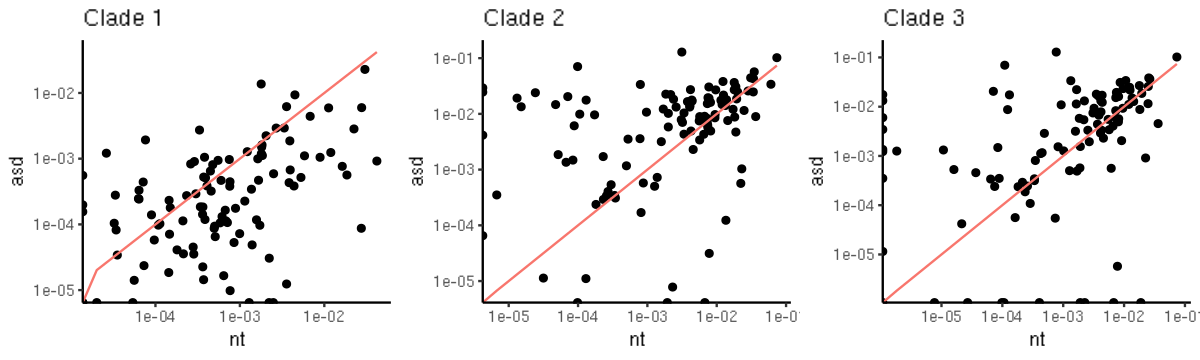

In [69]:
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/DECIPHER_2.rds")

df = data.frame(asd=a$person_variants[sample_data(a$ps)$phenotype=='A', order(a$p)[93]],
           nt=a$person_variants[sample_data(a$ps)$phenotype=='N', order(a$p)[93]])
p1 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 1')+ theme(legend.position="none")

df = data.frame(asd=a$person_variants[sample_data(a$ps)$phenotype=='A', order(a$p)[97]],
           nt=a$person_variants[sample_data(a$ps)$phenotype=='N', order(a$p)[97]])
p2 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 2')+ theme(legend.position="none")


df = data.frame(asd=a$person_variants[sample_data(a$ps)$phenotype=='A', order(a$p)[300]],
           nt=a$person_variants[sample_data(a$ps)$phenotype=='N', order(a$p)[300]])
p3 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 3') + theme(legend.position="none")

options(repr.plot.height=3, repr.plot.width=10)

grid.arrange(p1, p2, p3, nrow=1)

table(tax_table(a$ps)[names(which(t[93,]==1)), 'Genus'])
table(tax_table(a$ps)[names(which(t[97,]==1)), 'Genus'])
table(tax_table(a$ps)[names(which(t[281,]==1)), 'Genus'])

# Obese

In [19]:
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/obese_lean_twins/p_vals/DECIPHER_2.rds")
var_names = a$var_names[order(a$p)[1:1000],]
splits = strsplit(as.character(var_names[,1]), split = "\\.")
pos1=sapply(splits, function(x) as.integer(x[1]))
bases1=sapply(splits, function(x) (x[2]))
splits = strsplit(as.character(var_names[,2]), split = "\\.")
pos2=sapply(splits, function(x) as.integer(x[1]))
bases2=sapply(splits, function(x) (x[2]))  
t = apply(a$seq_df[,pos1], 1, function(x) x==bases1) & apply(a$seq_df[,pos2], 1, function(x) x==bases2)
t[t==T]=1
t[t==F]=0
t = t[rowSums(t)!=0,]
t = t[,colSums(t)!=0]

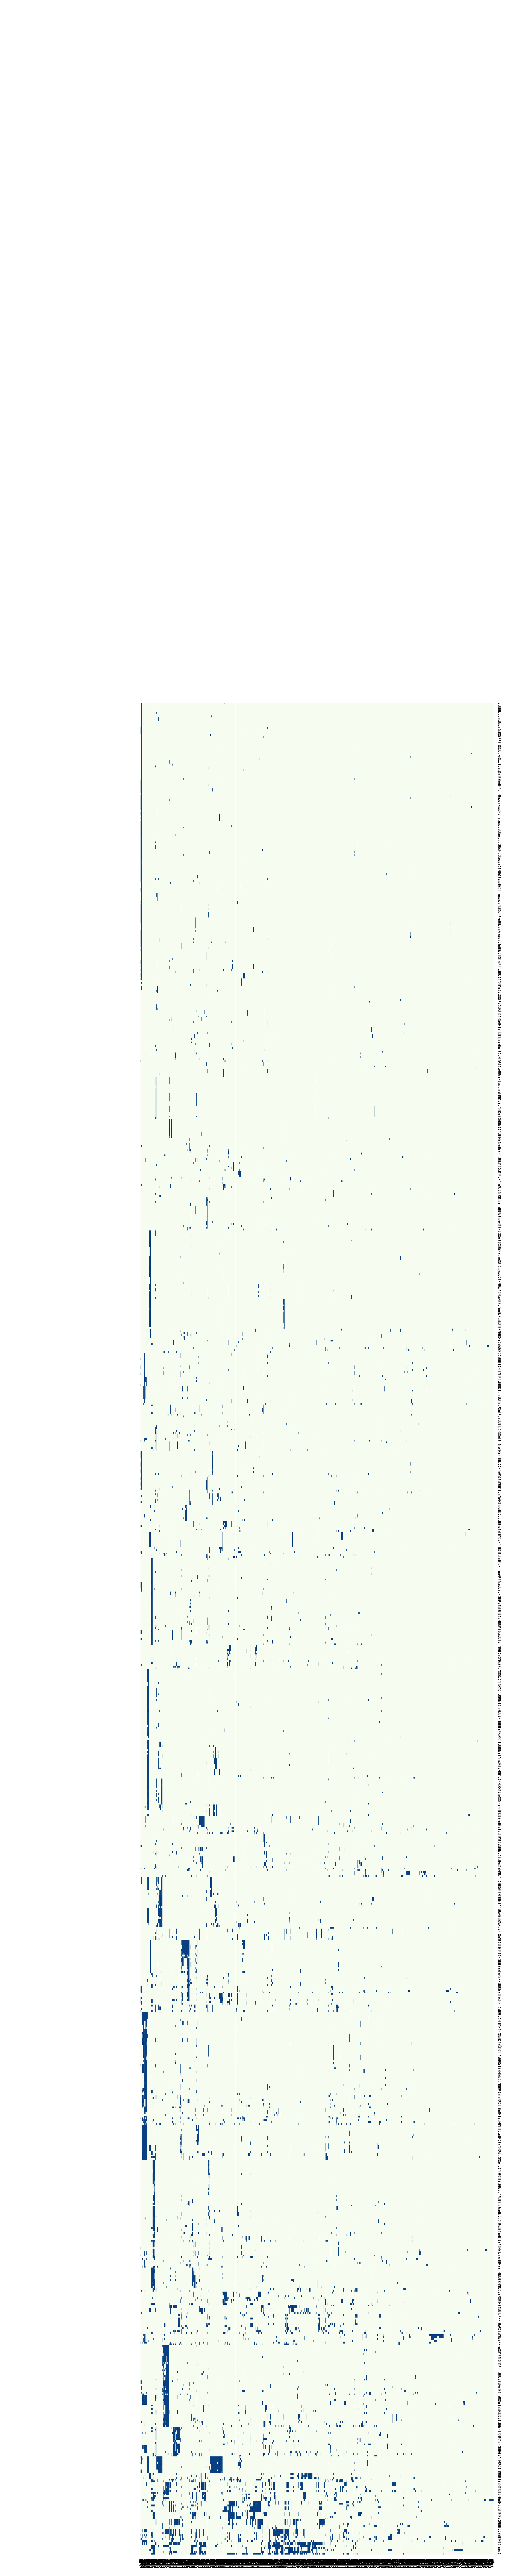

In [17]:
hmcol = colorRampPalette(brewer.pal(9, "GnBu"))(100)
options(repr.plot.height=5, repr.plot.width=5)
options(repr.plot.height=30, repr.plot.width=5)
p_heatmap=heatmap.2(t,  col=hmcol, trace='none', key=F, dendrogram = "none")
pdf('/oak/stanford/groups/dpwall/users/briannac/phyloWAS/results/figures/heatmap_obese.pdf', width=4, height=4)
heatmap.2(t,  col=hmcol, trace='none', key=F, dendrogram = "none", labCol = F, labRow = F, margins = c(2,2), main = "Obesity") + mytheme
dev.off()

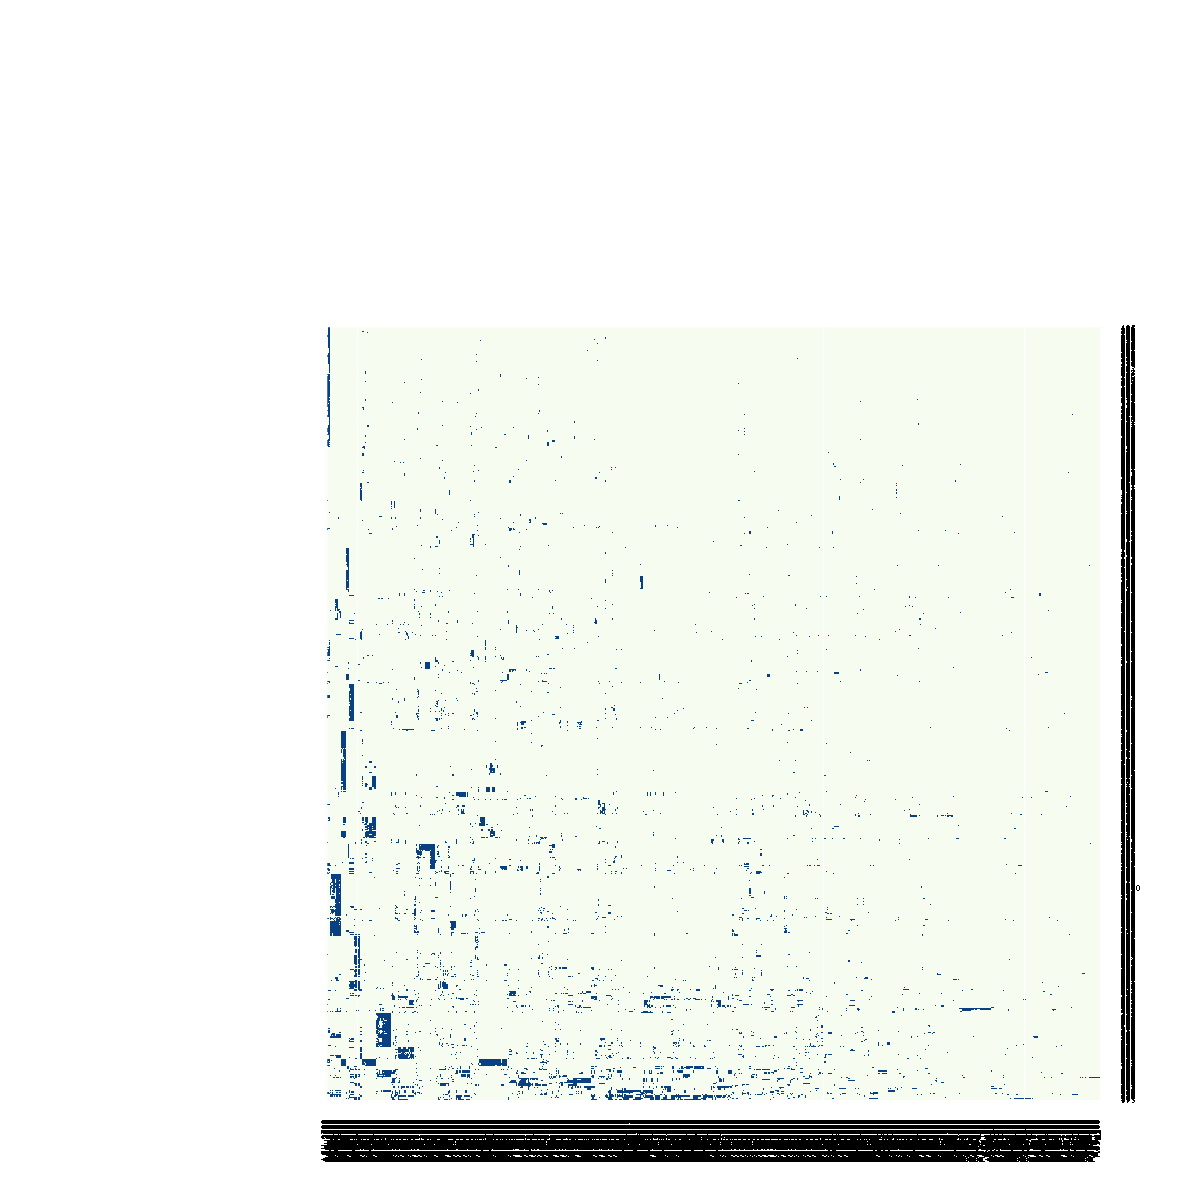

In [18]:
options(repr.plot.height=10, repr.plot.width=10)
p_heatmap=heatmap.2(t,  col=hmcol, trace='none', key=F, dendrogram = "none")

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 45 rows containing non-finite values (stat_ydensity).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 82 rows containing non-finite values (stat_ydensity).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 132 rows containing non-finite values (stat_ydensity).”


          CAG-508 Coriobacteriaceae  Oscillospiraceae 
                3                 1                42 


Acidaminococcaceae     Bacteroidaceae    Megasphaeraceae   Selenomonadaceae 
                 2                  1                 15                  1 
   Veillonellaceae 
                 5 


Gastranaerophilaceae      Lachnospiraceae 
                   8                    2 

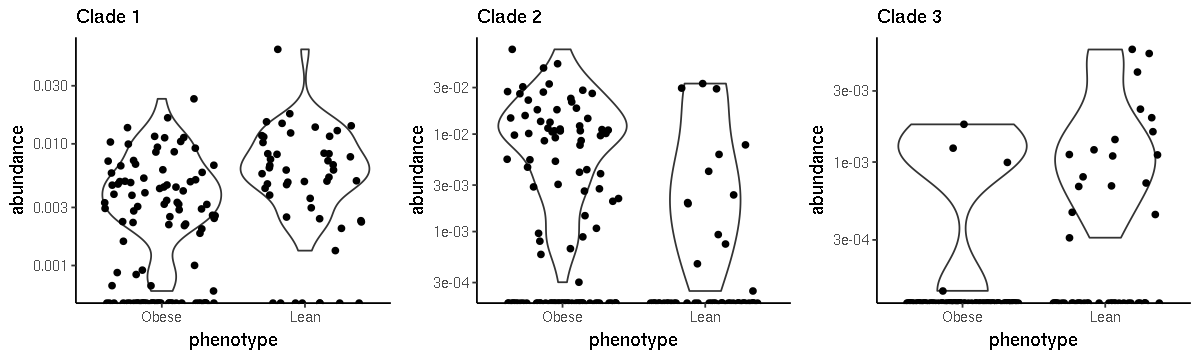

In [33]:
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/phyloWAS/results/obese_lean_twins/p_vals/DECIPHER_2.rds")

df = rbind(data.frame(abundance = a$person_variants[sample_data(a$ps)$obesitycat=='Obese', order(a$p)[76]], phenotype='Obese'),
           data.frame(abundance = a$person_variants[sample_data(a$ps)$obesitycat!='Obese', order(a$p)[76]], phenotype='Lean'))
p1 = ggplot(df) + geom_violin(aes(x=phenotype, y=abundance)) + geom_jitter(aes(x=phenotype, y=abundance)) + scale_y_log10() + mytheme + ggtitle('Clade 1')+ theme(legend.position="none")

df = rbind(data.frame(abundance = a$person_variants[sample_data(a$ps)$obesitycat=='Obese', order(a$p)[119]], phenotype='Obese'),
           data.frame(abundance = a$person_variants[sample_data(a$ps)$obesitycat!='Obese', order(a$p)[119]], phenotype='Lean'))
p2 = ggplot(df) + geom_violin(aes(x=phenotype, y=abundance)) + geom_jitter(aes(x=phenotype, y=abundance)) + scale_y_log10() + mytheme + ggtitle('Clade 2')+ theme(legend.position="none")

df = rbind(data.frame(abundance = a$person_variants[sample_data(a$ps)$obesitycat=='Obese', order(a$p)[1]], phenotype='Obese'),
           data.frame(abundance = a$person_variants[sample_data(a$ps)$obesitycat!='Obese', order(a$p)[1]], phenotype='Lean'))
p3 = ggplot(df) + geom_violin(aes(x=phenotype, y=abundance)) + geom_jitter(aes(x=phenotype, y=abundance)) + scale_y_log10() + mytheme + ggtitle('Clade 3')+ theme(legend.position="none")

options(repr.plot.height=3, repr.plot.width=10)

grid.arrange(p1, p2, p3, nrow=1)

taxa=tax_table(readRDS('/oak/stanford/groups/dpwall/microbiome/ncbi-datasets/obese_lean_twins/final/ps_with_taxa.rds'))

table(taxa[names(which(t[76,]==1)), 'Family'])
table(taxa[names(which(t[119,]==1)), 'Family'])
table(taxa[names(which(t[1,]==1)), 'Family'])


In [194]:
study='obese_lean_twins'
fdr = getFDRSmall(paste0("/oak/stanford/groups/dpwall/users/briannac/phyloWAS/results/", study, "/p_vals/ASVs.rds"))
fdr_df = data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, p=fdr$p_cutoff,type='ASV')

for (tax_level in c('Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')) {
    message(tax_level)
    fdr = getFDR(paste0("/oak/stanford/groups/dpwall/users/briannac/phyloWAS/results/", study, "/p_vals/", tax_level, '.rds'))
    fdr_df = rbind(fdr_df, data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, p=fdr$p_cutoff, type=tax_level))
}
for (type in c('DECIPHER_1', 'DECIPHER_2')) {
    fdr = getFDRSmall(paste0("/oak/stanford/groups/dpwall/users/briannac/phyloWAS/results/", study, "/p_vals/", type ,".rds"))
    fdr_df  = rbind(fdr_df, data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, p=fdr$p_cutoff,type=type))
}

Phylum
Using  as id variables
Class
Using  as id variables
Order
Using  as id variables
Family
Using  as id variables
Genus
Using  as id variables
Species
Using  as id variables


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 2550 rows containing missing values (geom_path).”

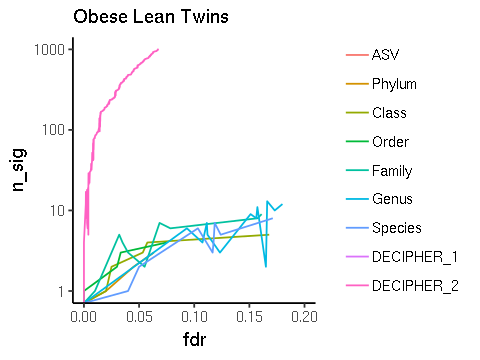

In [209]:
mytheme = theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), legend.title=element_blank(), legend.key=element_blank())
options(repr.plot.height=2, repr.plot.width=4)
ggplot(fdr_df[fdr_df$type!='DECIPHER_1']) + geom_line(aes(x=fdr,y=n_sig, color=type)) + xlim(0,.2) + scale_y_log10() + ggtitle('Obese Lean Twins') + mytheme

# Diabetes

In [ ]:
mytheme = theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), legend.title=element_blank(), legend.key=element_blank())
options(repr.plot.height=3, repr.plot.width=5)
ggplot(fdr_df) + geom_line(aes(x=fdr,y=n_sig, color=type)) + xlim(0,.2) + scale_y_log10() + ggtitle('Obese Lean Twins') + mytheme

In [ ]:
study='diabetes'
fdr = getFDRSmall(paste0("/oak/stanford/groups/dpwall/users/briannac/phyloWAS/results/", study, "/p_vals/ASVs.rds"))
fdr_df = data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, type='ASV')

for (tax_level in c('Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')) {
    message(tax_level)
    fdr = getFDR(paste0("/oak/stanford/groups/dpwall/users/briannac/phyloWAS/results/", study, "/p_vals/", tax_level, '.rds'))
    fdr_df = rbind(fdr_df, data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, type=tax_level))
}
for (type in c('DECIPHER_1', 'DECIPHER_2')) {
    fdr = getFDRSmall(paste0("/oak/stanford/groups/dpwall/users/briannac/phyloWAS/results/", study, "/p_vals/", type ,".rds"))
    fdr_df  = rbind(fdr_df, data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, type=type))
}


Warning message:
“Removed 2550 rows containing missing values (geom_path).”

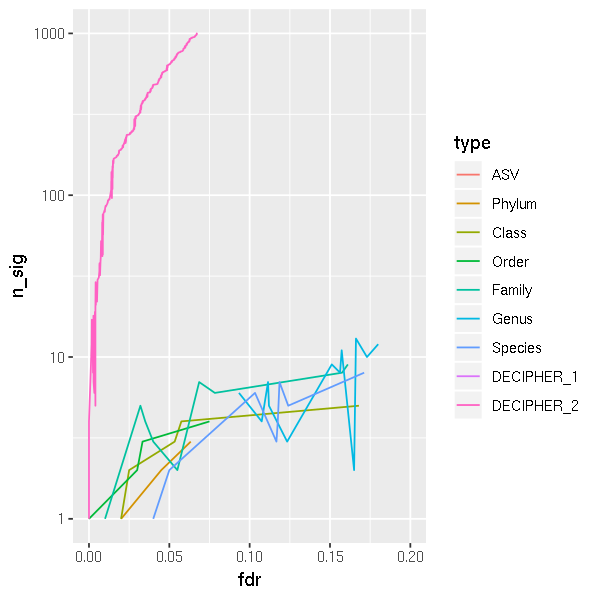

In [187]:
options(repr.plot.height=5, repr.plot.width=5)
ggplot(fdr_df) + geom_line(aes(x=fdr,y=n_sig, color=type)) + xlim(0,.2) + scale_y_log10()